In [ ]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocesamiento de datos

In [ ]:
year = 15                                                               #Cambiar año y ejecutar todo 0 <- 2015, 1<- 2016... etc 
auxy = np.arange(2000,2021,1)
data = [0 for i in range(len(auxy))]                                                               
for i,a in enumerate(auxy):
  data[i] = pd.read_csv("drive/MyDrive/Colab Notebooks/radiacion/570486_21.17_-101.70_"+str(a)+".csv",skiprows = 2,usecols= [1,2,3,4,5,6,7,13])#22])
colnam = ['Month','Day','Hour','Minute','DHI','DNI','GHI','ZAng']#,'GHUV']
for i in range(len(auxy)): data[i].columns = colnam
data[year].head()

,Month,Day,Hour,Minute,DHI,DNI,GHI,ZAng
0,1,1,0,30,0,0,0,174.98
1,1,1,1,30,0,0,0,170.58
2,1,1,2,30,0,0,0,156.82
3,1,1,3,30,0,0,0,143.04
4,1,1,4,30,0,0,0,129.35


In [ ]:
def ansuz(dat):
    tempDHI,tempDNI,tempGHI,I0t = [[] for i in range(12)],[[] for i in range(12)],[[] for i in range(12)],[[] for i in range(12)]
    tempFD,tempIC = [0 for i in range(12)],[0 for i in range(12)]
    nnd,E0t = 0, 1 + 0.033*np.cos(2*np.pi*np.arange(1,366,1)/365)
    for i in range(12):
        temp = dat[dat.Month == i+1]
        for j in range(7,19):                                         #Tomamos horas que nos interesan, 7 a 18 horas
            aux = temp[temp.Hour==j]
            nd = len(aux)
            tempDHI[i].append(np.average(aux.DHI))
            tempDNI[i].append(np.average(aux.DNI))
            tempGHI[i].append(np.average(aux.GHI))
            #tempGHUV[i].append(np.average(aux.GHUV))
            I0t[i].append(abs(np.average((1367)*E0t[nnd:(nnd+nd)]*np.cos(np.radians(aux.ZAng)))))
        nnd += nd
        tempFD[i] = np.nan_to_num((np.array(tempDHI[i])/np.array(tempGHI[i])))
        tempIC[i] = np.nan_to_num((np.array(tempGHI[i])/np.array(I0t[i])))
    return tempDHI,tempDNI,tempGHI,tempFD,tempIC,I0t

In [ ]:
DHI,DNI,GHI,FrDif,IndCla,I0 = [0 for i in range(len(auxy))],[0 for i in range(len(auxy))],[0 for i in range(len(auxy))],[0 for i in range(len(auxy))],[0 for i in range(len(auxy))],[0 for i in range(len(auxy))] 
for i in range(len(auxy)):
  DHI[i],DNI[i],GHI[i],FrDif[i],IndCla[i],I0[i] = ansuz(data[i].copy())             #promedia datos por hora al mes, ignora warnings, es por los nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


## **A partir de aquí solo son cosas para graficar.**

In [ ]:
#Esto solo son cosas para las gráficas
month = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
         "Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
mark = ["X","o","v","8","s","p","P","*","+","x","d",".","X","o","v","8","s","p","P","*","+"]

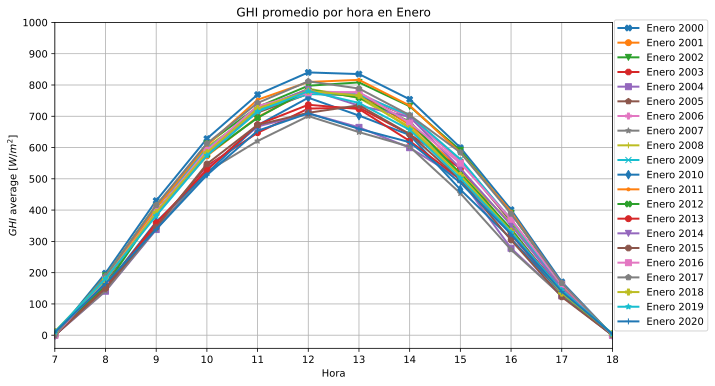

In [ ]:
#Gráfica de ejemplo, cambia datos o mes según se requiera
mes = 1
datos = GHI
plt.rcParams['figure.figsize'] = (10,6)
for i in range(len(auxy)): plt.plot(np.arange(7,19,1),datos[i][mes-1],marker = mark[i],label = " ".join((month[mes-1],str(auxy[i]))), linewidth = 2)
plt.legend(loc = 1,bbox_to_anchor=(1.18, 1.023))
plt.title("".join(("GHI"," promedio por hora en ",month[mes-1])),loc='center')
plt.xlabel('Hora')
plt.ylabel('$GHI$ average [$W/m^2$]')
plt.xlim([7,18])
plt.xticks(np.arange(7,19,1))
plt.yticks(np.arange(0,1100,100))
plt.grid()

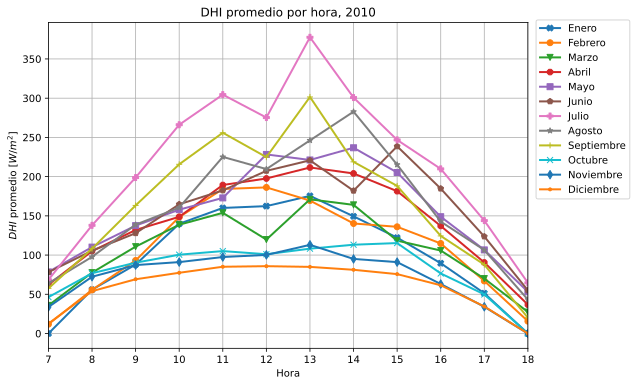

In [ ]:
#DHI
year = 10
plt.rcParams['figure.figsize'] = (8.6,6)
for i in range(12):
    plt.plot(np.arange(7,19,1),DHI[year][i],marker = mark[i], label = month[i],linewidth = 2)
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("DHI promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$DHI$ promedio [$W/m^2$]')
plt.xlim([7,18])
plt.xticks(np.arange(7,19,1))
plt.grid()

Text(0, 0.5, '$DHI$ promedio [$W/m^2$]')

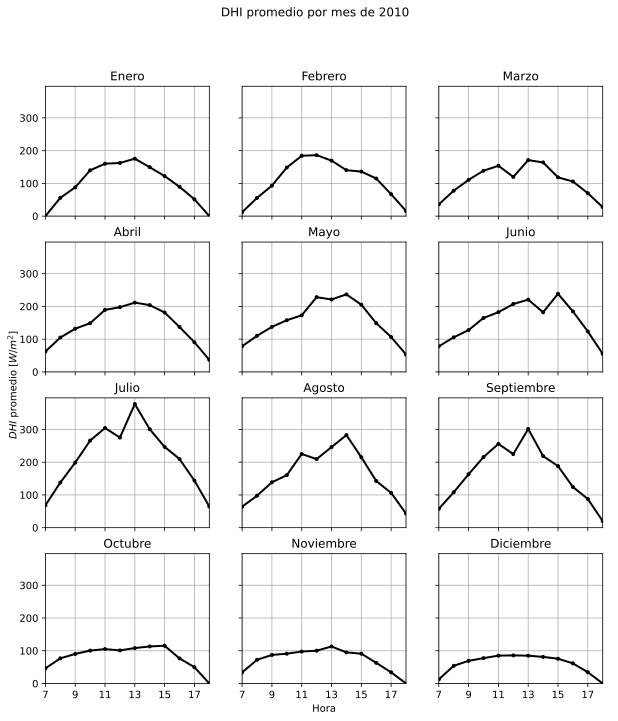

In [ ]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
plt.setp(ax, xticks=np.arange(7,19,2))
mx = np.amax(np.array(DHI[year]))
k = 0
fig.suptitle(" ".join(('DHI promedio por mes de',str(auxy[year]))))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(7,19,1),DHI[year][k],marker = ".",color = "Black",linewidth = 2)
        ax[i,j].set_title(month[k])
        ax[i,j].set_ylim([0,mx+mx*0.05])
        ax[i,j].set_xlim([7,18])
        ax[i,j].grid()
        k+=1
plt.tick_params(labelcolor='none', which='major', top=False, bottom=False, left=False, right=False)
plt.xlabel('Hora')
plt.ylabel('$DHI$ promedio [$W/m^2$]')

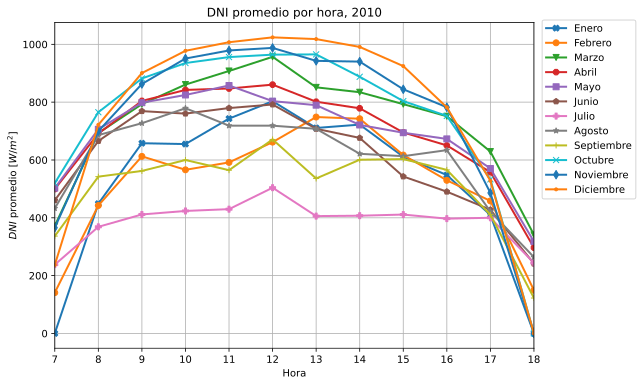

In [ ]:
#DNI
plt.rcParams['figure.figsize'] = (8.6,6)
for i in range(12):
    plt.plot(np.arange(7,19,1),DNI[year][i],marker = mark[i], label = month[i],linewidth = 2)
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("DNI promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$DNI$ promedio [$W/m^2$]')
plt.xlim([7,18])
plt.xticks(np.arange(7,19,1))
plt.grid()

Text(0, 0.5, '$DNI$ promedio [$W/m^2$]')

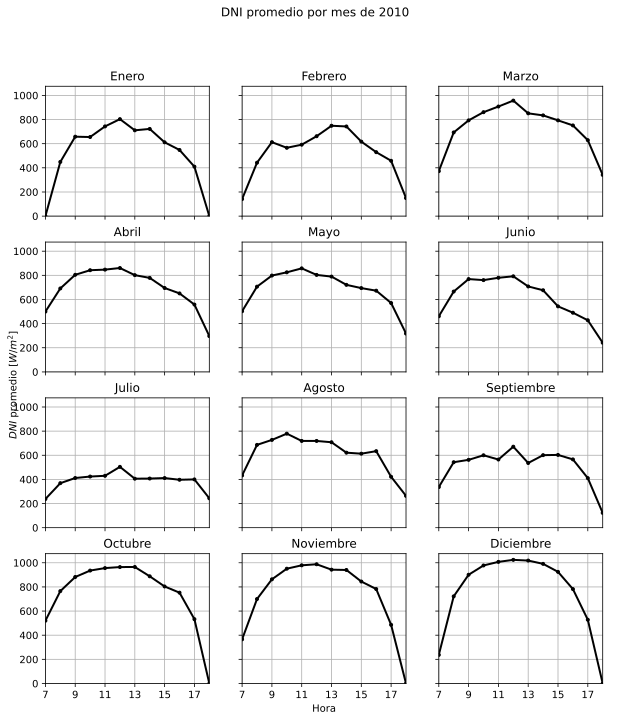

In [ ]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
plt.setp(ax, xticks=np.arange(7,19,2))
mx = np.amax(np.array(DNI[year]))
k = 0
fig.suptitle(" ".join(('DNI promedio por mes de',str(auxy[year]))))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(7,19,1),DNI[year][k],marker = ".",color = "Black",linewidth = 2)
        ax[i,j].set_title(month[k])
        ax[i,j].set_ylim([0,mx+mx*0.05])
        ax[i,j].set_xlim([7,18])
        ax[i,j].grid()
        k+=1
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Hora')
plt.ylabel('$DNI$ promedio [$W/m^2$]')

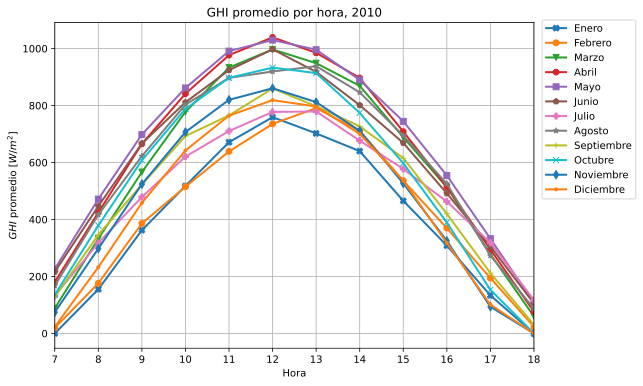

In [ ]:
#GHI
plt.rcParams['figure.figsize'] = (8.6,6)
for i in range(12):
    plt.plot(np.arange(7,19,1),GHI[year][i],marker = mark[i], label = month[i],linewidth = 2)
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("GHI promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$GHI$ promedio [$W/m^2$]')
plt.xlim([7,18])
plt.xticks(np.arange(7,19,1))
#plt.yticks(np.arange(0,1200,100))
plt.grid()

Text(0, 0.5, '$GHI$ promedio [$W/m^2$]')

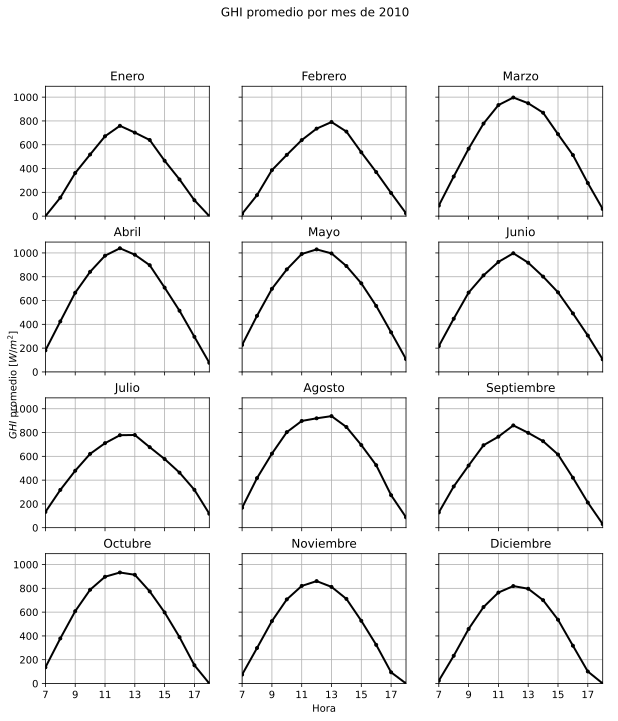

In [ ]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
plt.setp(ax, xticks=np.arange(7,19,2))
mx = np.amax(np.array(GHI[year]))
k = 0
fig.suptitle(" ".join(('GHI promedio por mes de',str(auxy[year]))))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(7,19,1),GHI[year][k],marker = ".",color = "Black",linewidth = 2)
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        ax[i,j].set_ylim([0,mx+mx*0.05])
        ax[i,j].set_xlim([7,18])
        k+=1
plt.tick_params(labelcolor='none', which='major', top=False, bottom=False, left=False, right=False)
plt.xlabel('Hora')
plt.ylabel('$GHI$ promedio [$W/m^2$]')

#Promedios por mes tomando de 2000 a 2020


In [ ]:
#Media de GHI de 2000 a 2020
GHI,GHIM = np.array(GHI),[]
for i in range(12):
  GHIM.append(np.average(GHI[:,i],axis=0))
  #GHIM.append(np.average(GHI[16:21,i],axis=0))

#csvdI = pd.DataFrame(np.stack(GHIM,axis = 1))
#csvdU = pd.DataFrame(np.stack(GHUVM,axis = 1))
#csvdU.columns,csvdI.columns = month,month
#csvdU.index,csvdI.index = np.arange(7,19,1),np.arange(7,19,1)
#csvdU.to_csv('drive/MyDrive/Colab Notebooks/GHUV.csv', sep=',')
#csvdI.to_csv('drive/MyDrive/Colab Notebooks/GHI.csv', sep=',')

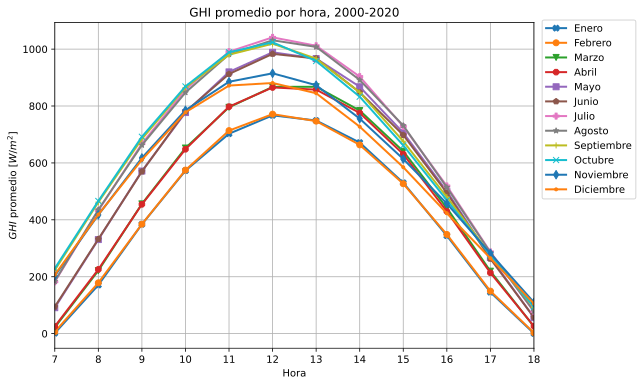

In [ ]:
#GHI prom
plt.rcParams['figure.figsize'] = (8.6,6)
for i in range(12):
    plt.plot(np.arange(7,19,1),GHIM[i],marker = mark[i], label = month[i],linewidth = 2)
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title("GHI promedio por hora, 2000-2020",loc='center')
plt.xlabel('Hora')
plt.ylabel('$GHI$ promedio [$W/m^2$]')
plt.xlim([7,18])
plt.xticks(np.arange(7,19,1))
plt.grid()

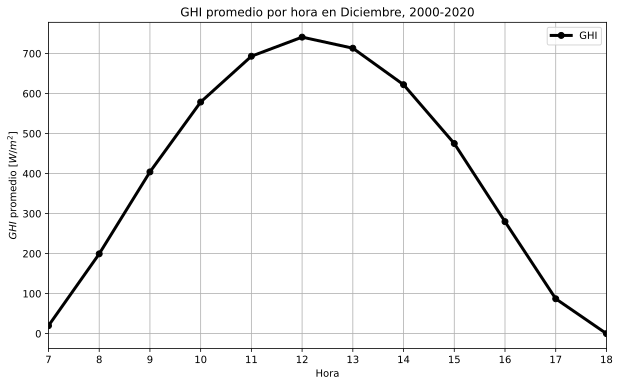

In [ ]:
mes = 12
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(np.arange(7,19,1),GHIM[mes-1],marker = "o",color="Black",label = "GHI", linewidth = 3)
plt.legend()
plt.title("".join(("GHI"," promedio por hora en ",month[mes-1], ", 2000-2020")),loc='center')
plt.xlabel('Hora')
plt.ylabel('$GHI$ promedio [$W/m^2$]')
plt.xlim([7,18])
plt.xticks(np.arange(7,19,1))
plt.grid()

Text(0, 0.5, '$GHI$ promedio [$W/m^2$]')

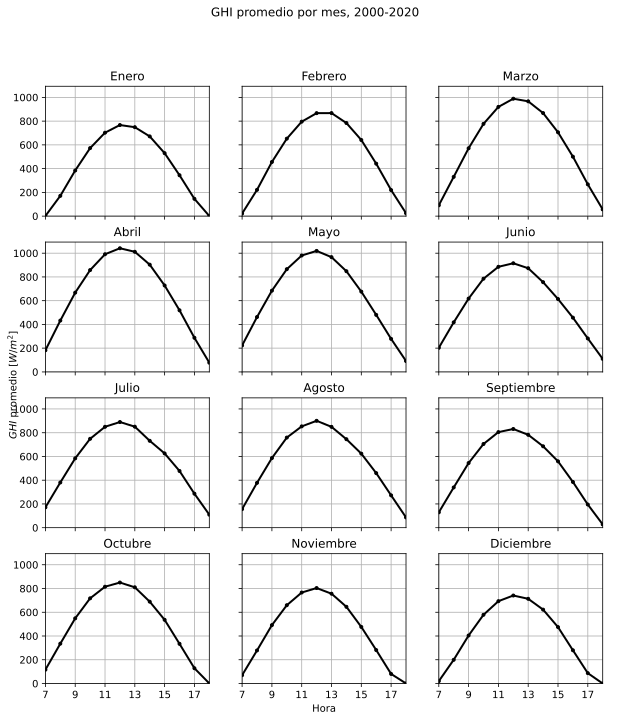

In [ ]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
plt.setp(ax, xticks=np.arange(7,19,2))
mx = np.amax(np.array(GHIM))
k = 0
fig.suptitle('GHI promedio por mes, 2000-2020')
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(7,19,1),GHIM[k],marker = ".",color = "Black",linewidth = 2)
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        ax[i,j].set_ylim([0,mx+mx*0.05])
        ax[i,j].set_xlim([7,18])
        k+=1
plt.tick_params(labelcolor='none', which='major', top=False, bottom=False, left=False, right=False)
plt.xlabel('Hora')
plt.ylabel('$GHI$ promedio [$W/m^2$]')

# **Índice de claridad $k_t$ y fracción difusa $d$**
# $\boxed{d = \frac{DHI}{GHI}}\;\;\;\;$ $\;\;\;\boxed{K_t = \frac{GHI}{I_0}}$
## *Radiación extraterrestre* $I_0 = I_{cs} E_0 \cos{\theta_z}$ 
## $E_0 = 1 + 0.033 \cos(2\pi n/365)\;,\;\;\;\; n = 1,2,3,... 365$
## $I_{cs} = 1367 \; {[Wm^{-2}]}$

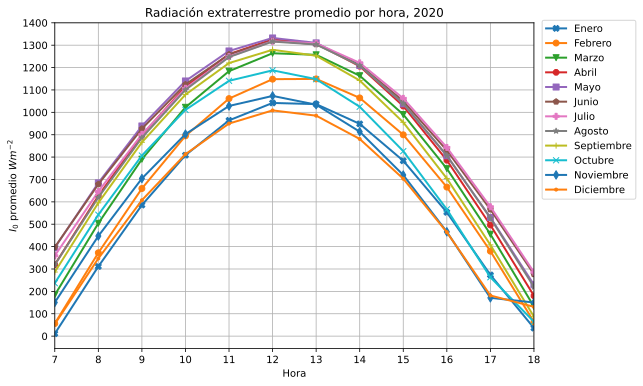

In [ ]:
#Radiación extraterrestre
plt.rcParams['figure.figsize'] = (8.6,6)                                           
for i in range(12):
    plt.plot(np.arange(7,19,1),I0[year][i],marker = mark[i], label = month[i],linewidth = 2) 
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("Radiación extraterrestre promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$I_0$ promedio $Wm^{-2}$')
plt.xticks(np.arange(7,19,1))
plt.yticks(np.arange(0,1500,100))
plt.xlim([7,18])
plt.grid()

Text(0, 0.5, '$I_0$ promedio')

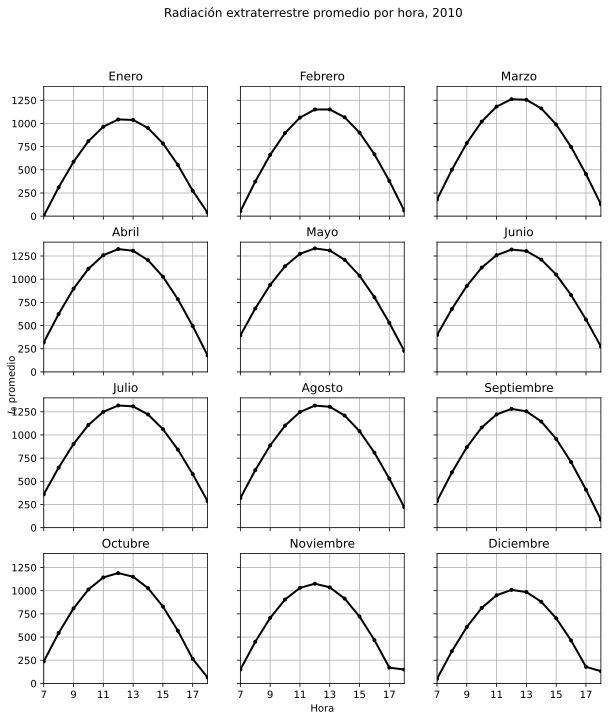

In [ ]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
plt.setp(ax, xticks=np.arange(7,19,2))
k = 0
fig.suptitle(" ".join(('Radiación extraterrestre promedio por hora,',str(auxy[year]))))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(7,19,1),I0[year][k],marker = ".",color = "Black",linewidth=2)
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        ax[i,j].set_ylim([0,1400])
        ax[i,j].set_xlim([7,18])
        k+=1
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylim([0,1])
plt.xlabel('Hora')
plt.ylabel('$I_0$ promedio')

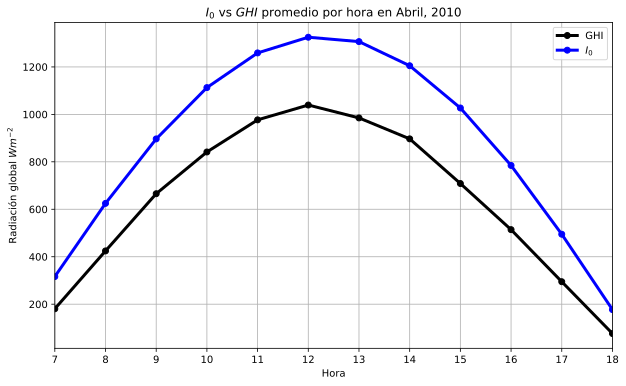

In [ ]:
#Radiación global vs radiación extraterrestre
mes = 4
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(np.arange(7,19,1),GHI[year][mes-1],marker = "o",color="black",label = "GHI",linewidth=3)
plt.plot(np.arange(7,19,1),I0[year][mes-1],marker = "o",color="blue",label = "$I_0$",linewidth=3)
plt.legend()
plt.title("".join(("$I_0$ vs $GHI$"," promedio por hora en ",month[mes-1],", ", str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('Radiación global $Wm^{-2}$',)
plt.xlim([7,18])
plt.xticks(np.arange(7,19,1))
plt.grid()

Text(0, 0.5, 'Radiación global $Wm^{-2}$')

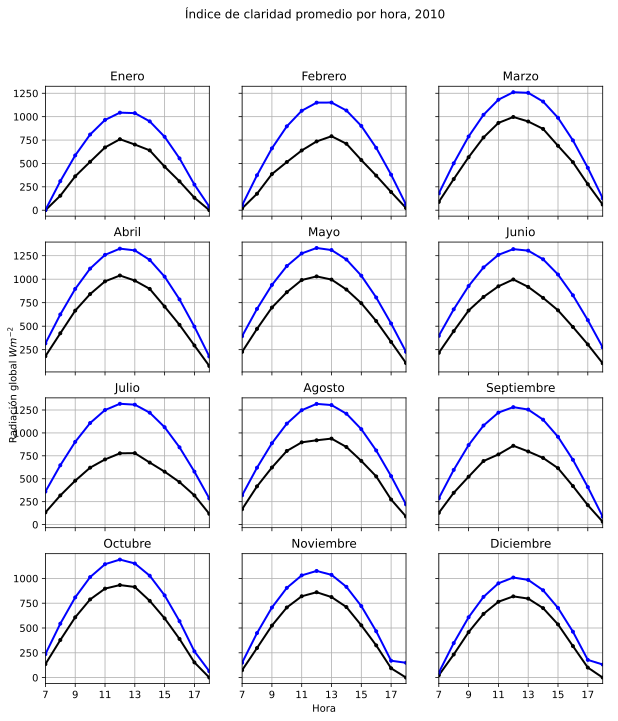

In [ ]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
plt.setp(ax, xticks=np.arange(7,19,2))
k = 0
fig.suptitle(" ".join(('Índice de claridad promedio por hora,',str(auxy[year]))))
#mx = np.amax(np.array(IndCla))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(7,19,1),GHI[year][k],marker = ".",color = "Black",linewidth=2)
        ax[i,j].plot(np.arange(7,19,1),I0[year][k],marker = ".",color = "blue",linewidth=2)
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        #ax[i,j].set_ylim([0,1300])
        ax[i,j].set_xlim([7,18])
        k+=1
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylim([0,1])
plt.xlabel('Hora')
plt.ylabel('Radiación global $Wm^{-2}$')

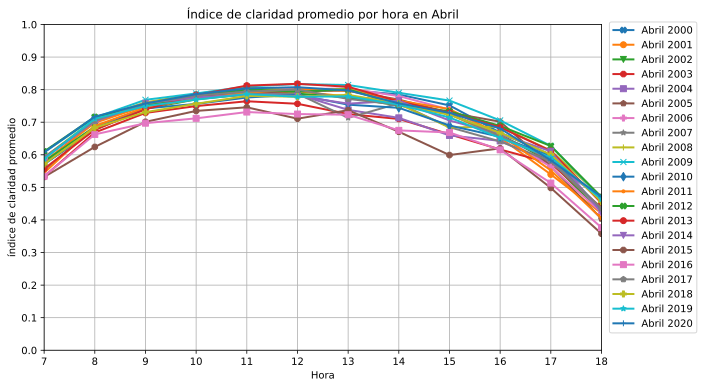

In [ ]:
mes = 4
plt.rcParams['figure.figsize'] = (10,6)
for i in range(len(auxy)): plt.plot(np.arange(7,19,1),IndCla[i][mes-1],marker = mark[i],label = " ".join((month[mes-1],str(auxy[i]))), linewidth = 2)
plt.legend(loc = 1,bbox_to_anchor=(1.18, 1.023))
plt.title("".join(("Índice de claridad promedio por hora en ",month[mes-1])),loc='center')
plt.xlabel('Hora')
plt.ylabel('índice de claridad promedio')
plt.xlim([11,14])
plt.xticks(np.arange(7,19,1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()

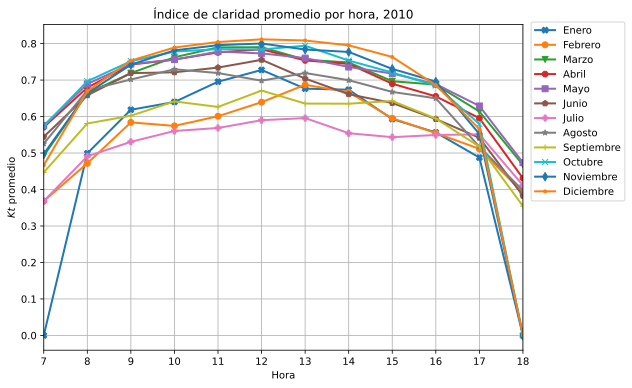

In [ ]:
#Índice de claridad
plt.rcParams['figure.figsize'] = (8.6,6)
#mx = np.amax(np.array(IndCla))                                            
for i in range(12):
    plt.plot(np.arange(7,19,1),IndCla[year][i],marker = mark[i], label = month[i],linewidth = 2)          #IndCla[year][i]/mx
plt.legend(loc = 1,bbox_to_anchor=(1.223, 1.023))
plt.title(" ".join(("Índice de claridad promedio por hora,",str(auxy[year]))),loc='center')
plt.xlabel('Hora')
plt.ylabel('$Kt$ promedio')
plt.xticks(np.arange(7,19,1))
plt.xlim([7,18])
plt.grid()

Text(0, 0.5, '$Kt$ promedio')

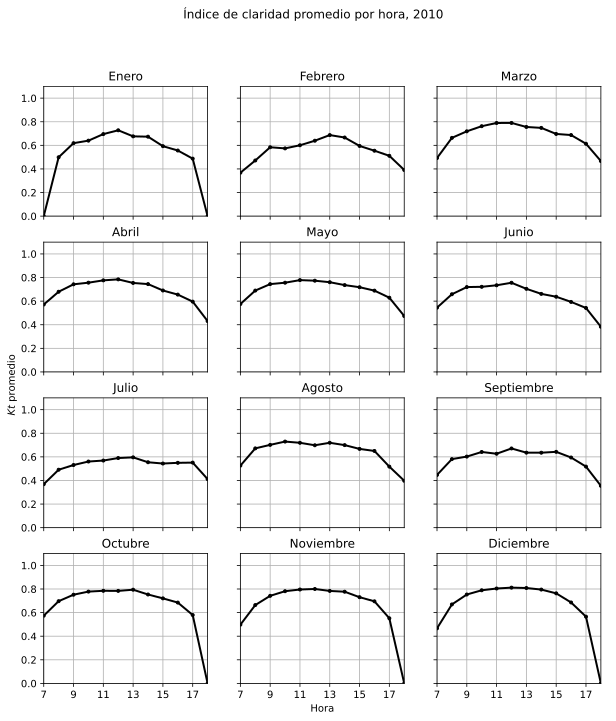

In [ ]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
plt.setp(ax, xticks=np.arange(7,19,2))
k = 0
fig.suptitle(" ".join(('Índice de claridad promedio por hora,',str(auxy[year]))))
#mx = np.amax(np.array(IndCla))
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.arange(7,19,1),IndCla[year][k],marker = ".",color = "Black",linewidth=2)
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        ax[i,j].set_ylim([0,1.1])
        ax[i,j].set_xlim([7,18])
        k+=1
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylim([0,1])
plt.xlabel('Hora')
plt.ylabel('$Kt$ promedio')

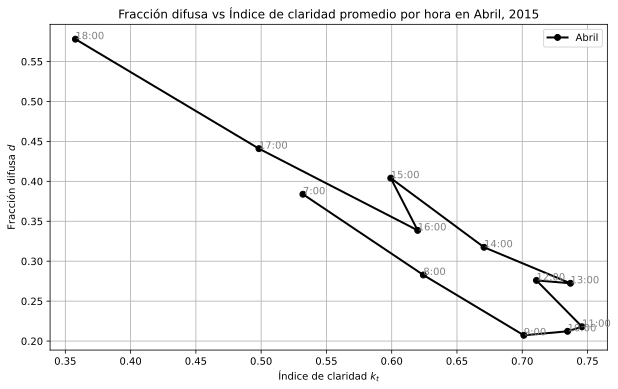

In [ ]:
#Índice de claridad vs Fracción difusa. (No grafico los ceros)
mes = 4
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(np.ma.masked_equal(IndCla[year][mes-1],0),np.ma.masked_equal(FrDif[year][mes-1],0),marker = "o", label = month[mes-1],color = "Black",linewidth = 2)
plt.legend()
plt.title("".join(("Fracción difusa vs Índice de claridad promedio por hora en ",month[mes-1],", ",str(auxy[year]))),loc='center')
plt.xlabel('Índice de claridad $k_t$')
plt.ylabel('Fracción difusa $d$')
plt.grid()
nn = np.arange(7,19,1)
for i, txt in enumerate(nn):
  plt.annotate("".join((str(txt),":00")), (np.ma.masked_equal(IndCla[year][mes-1][i],0),np.ma.masked_equal(FrDif[year][mes-1][i],0)),xycoords = 'data',color="gray")

Text(0, 0.5, 'Fracción Difusa $d$')

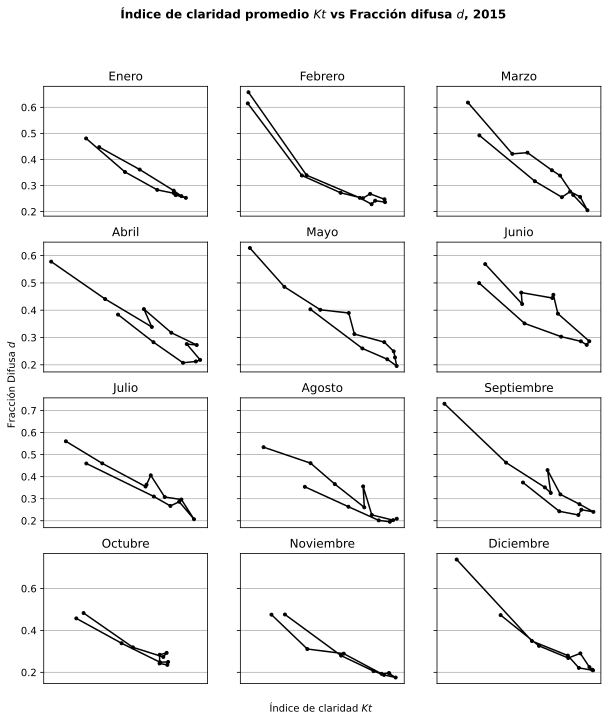

In [ ]:
plt.rcParams['figure.figsize'] = (10,11)
fig, ax = plt.subplots(4, 3,sharex='col', sharey='row')
fig.add_subplot(111, frameon=False)
plt.setp(ax, xticks=np.arange(7,19,2))
k = 0
fig.suptitle(" ".join(('Índice de claridad promedio $Kt$ vs Fracción difusa $d$,',str(auxy[year]))),fontsize=12, fontweight='semibold')
for i in range(4):
    for j in range(3):
        ax[i,j].plot(np.ma.masked_equal(IndCla[year][k],0),np.ma.masked_equal(FrDif[year][k],0),marker = ".",color = "Black")
        ax[i,j].set_title(month[k])
        ax[i,j].grid()
        k+=1
plt.tick_params(labelcolor='none',axis = 'both', which='major', top=False, bottom=False, left=False, right=False)
plt.xlabel('Índice de claridad $Kt$ ')
plt.ylabel('Fracción Difusa $d$')

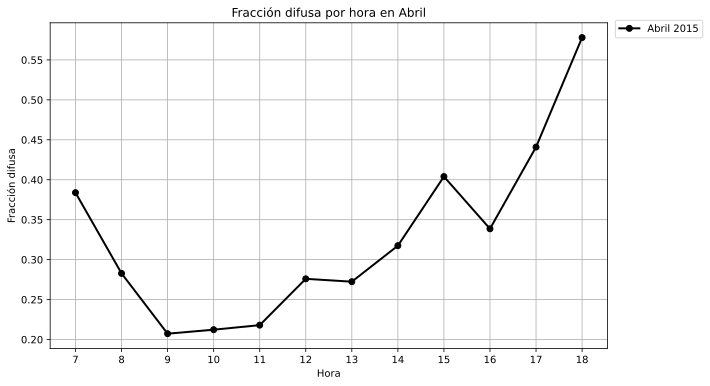

In [ ]:
mes = 4
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(np.arange(7,19,1),FrDif[year][mes-1],marker = mark[1],label = " ".join((month[mes-1],str(auxy[year]))), linewidth = 2, color = 'black')
plt.legend(loc = 1,bbox_to_anchor=(1.18, 1.023))
plt.title("".join(("Fracción difusa por hora en ",month[mes-1])),loc='center')
plt.xlabel('Hora')
plt.ylabel('Fracción difusa')
#plt.xlim([11,14])
plt.xticks(np.arange(7,19,1))
#plt.yticks(np.arange(0,1.1,0.1))
plt.grid()